# Objective
This report aims to explore the factors affecting diabetes using a real-world dataset provided in the course *WM-ASDS01: Research Methodology*. This data contains 22 attributes related to health, lifestyle, and demographics, with a total of 253,680 individual records. Each student has been instructed to work with a specific 1000 rows, a subset of the dataset. 

I, **Zinia Sultana Joti** (student ID: **20231278**), have selected rows 48000 to 48999 for the analysis. This report includes data preprocessing, exploratory data analysis (EDA), statistical insights, and visual interpretations to find patterns and potential predictors of diabetes.

# Data Description
* Almost 15 variables are categorical, meaning the presence or absence of a condition or habit.
* 7 variables are numerical or ordinal (like BMI, Age, MentHlth).
* No units are provided. However, assumptions can be made based on variable names (e.g., BMI = kg/m²).

| **Features**         | **Description**                                                   |
|-------------------------|-------------------------------------------------------------------|
| <strong>Binary / Categorical (0/1):</strong> | |
| Diabetes_012            | Target variable — 0: No, 1: Prediabetes, 2: Diabetes              |
| HighBP                  | High blood pressure (0 = No, 1 = Yes)                             |
| HighChol                | High cholesterol (0 = No, 1 = Yes)                                |
| CholCheck               | Had cholesterol checked in past 5 years (0 = No, 1 = Yes)         |
| Smoker                  | Ever smoked ≥100 cigarettes (0 = No, 1 = Yes)                     |
| Stroke                  | History of stroke (0 = No, 1 = Yes)                               |
| HeartDiseaseorAttack    | Coronary conditions like heart disease or heart attack (0/1)      |
| PhysActivity            | Physical activity in past month (0 = No, 1 = Yes)                 |
| Fruits                  | Eats fruit ≥1 time/day (0 = No, 1 = Yes)                          |
| Veggies                 | Eats vegetables ≥1 time/day (0 = No, 1 = Yes)                     |
| HvyAlcoholConsump       | Heavy drinking (0 = No, 1 = Yes)                                  |
| AnyHealthcare           | Has any kind of health coverage (0 = No, 1 = Yes)                 |
| NoDocbcCost             | Couldn’t see doctor due to cost (0 = No, 1 = Yes)                 |
| DiffWalk                | Difficulty walking/climbing stairs (0 = No, 1 = Yes)              |
| Sex                     | Biological sex (0 = Female, 1 = Male)                             |
| <strong>Numerical / Ordinal:</strong> | |
| BMI                     | Body Mass Index (kg/m²)                                           |
| MentHlth                | Days of poor mental health in the past 30 days (0–30)             |
| PhysHlth                | Days of poor physical health in the past 30 days (0–30)           |
| Age                     | Encoded age groups (e.g., 1 = 18–24, 2 = 25–29, ...)              |
| Education               | Education level (1 = Never attended school, 6 = College 4+ years) |
| Income                  | Income bracket (1 = < $10k, ..., 8 = ≥ $75k)                      |
| GenHlth                 | Self-reported general health (1 = Excellent → 5 = Poor)           |


In [1]:
# install necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "/kaggle/input/diabetes-and-heart-disease/ResearchMethodology.csv"

# Load the latest version
df_full = pd.read_csv(file_path)

print("First 5 records:", df_full.head())

First 5 records:    Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0    

In [3]:
# Selected dataset
df = df_full.iloc[48000:49000].copy()
df.to_csv('diabetes_selected_1000.csv', index = False)

The subset of 1000-rows are stored into ***diabetes_selected_1000.csv***

# Data Preprocessing

In [4]:
# basic information about the data
print(f"Shape of the selected dataset: {df.shape} \n")
print(f"Basic information about the dataset: \n")
df.info()
print('\n First few rows of the dataset: \n')
df.head()

Shape of the selected dataset: (1000, 22) 

Basic information about the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 48000 to 48999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          1000 non-null   float64
 1   HighBP                1000 non-null   float64
 2   HighChol              1000 non-null   float64
 3   CholCheck             1000 non-null   float64
 4   BMI                   1000 non-null   float64
 5   Smoker                1000 non-null   float64
 6   Stroke                1000 non-null   float64
 7   HeartDiseaseorAttack  1000 non-null   float64
 8   PhysActivity          1000 non-null   float64
 9   Fruits                1000 non-null   float64
 10  Veggies               1000 non-null   float64
 11  HvyAlcoholConsump     1000 non-null   float64
 12  AnyHealthcare         1000 non-null   float64
 13  NoDocbcCost           1000 non-null

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
48000,2.0,0.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,8.0,0.0,1.0,13.0,6.0,6.0
48001,2.0,1.0,1.0,1.0,22.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,6.0,8.0
48002,0.0,0.0,1.0,1.0,48.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,30.0,1.0,1.0,7.0,6.0,8.0
48003,0.0,1.0,1.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,6.0,8.0
48004,0.0,1.0,0.0,1.0,38.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,5.0,5.0


In [5]:
# duplicate data
print(f"Number of duplicate rows: {df.duplicated().sum()}\n")
print('Show all versions of duplicates(both originals and copies): \n')
df[df.duplicated(keep=False)]

Number of duplicate rows: 2

Show all versions of duplicates(both originals and copies): 



,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
48704,0.0,0.0,0.0,1.0,19.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,6.0,6.0
48832,0.0,0.0,0.0,1.0,19.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,6.0,6.0
48896,0.0,0.0,0.0,1.0,20.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
48980,0.0,0.0,0.0,1.0,20.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0


In [6]:
# Drop the duplicates to avoid any skewness
df.drop_duplicates()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
48000,2.0,0.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,8.0,0.0,1.0,13.0,6.0,6.0
48001,2.0,1.0,1.0,1.0,22.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,6.0,8.0
48002,0.0,0.0,1.0,1.0,48.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,30.0,1.0,1.0,7.0,6.0,8.0
48003,0.0,1.0,1.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,6.0,8.0
48004,0.0,1.0,0.0,1.0,38.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48995,0.0,0.0,1.0,1.0,25.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,4.0,0.0,1.0,11.0,6.0,5.0
48996,0.0,1.0,1.0,1.0,26.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,4.0,0.0,10.0,0.0,1.0,13.0,4.0,7.0
48997,0.0,0.0,0.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,12.0,4.0,5.0
48998,0.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,4.0,14.0,0.0,0.0,10.0,6.0,8.0


Two duplicate rows were found in the selected dataset using **df.duplicated()**. These duplicates were removed using **df.drop_duplicates()** to prevent bias or redundancy in the analysis.

In [7]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

There are no null values or missing data. 

Converting ***"Diabetes_012"*** to ***"HasDiabetes"***

In [8]:
df['HasDiabetes'] = df['Diabetes_012'].apply(lambda x: 1 if x == 2 else 0)
df['HasDiabetes'].value_counts()

HasDiabetes
0    861
1    139
Name: count, dtype: int64

In [9]:
# Moving HasDiabetes to the front for better readability
cols = ['HasDiabetes'] + [col for col in df.columns if col != 'HasDiabetes']
df = df[cols]
df.head()

,HasDiabetes,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
48000,1,2.0,0.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,8.0,0.0,1.0,13.0,6.0,6.0
48001,1,2.0,1.0,1.0,1.0,22.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,6.0,8.0
48002,0,0.0,0.0,1.0,1.0,48.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,30.0,1.0,1.0,7.0,6.0,8.0
48003,0,0.0,1.0,1.0,1.0,26.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,6.0,8.0
48004,0,0.0,1.0,0.0,1.0,38.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,5.0,5.0


In [10]:
df.drop('Diabetes_012', axis=1, inplace=True)

The target variable **Diabetes_012** originally had three categories: 0 (No), 1 (Prediabetes), and 2 (Diabetes). As instructed, this was transformed into a binary variable, **HasDiabetes**, where 0 and 1 were grouped as 0 (‘No diabetes’), and 2 was assigned as 1 (‘Has diabetes’). 

# Descriptive Statistics

In [11]:
numerical_cols = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth','Age', 'Education', 'Income']
categorical_cols = [col for col in df.columns if col not in numerical_cols]

### Numerical Features Distribution and Association with Diabetes
By using ***describe()***, the relation among the numerical attributes and diabetes are interpreted as follows: 

In [12]:
# numerical descriptive statistics
df[numerical_cols].describe()

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,26.226000,2.625000,2.445000,4.631000,9.499000,5.205000,6.134000
std,5.169298,0.993661,6.497168,8.924039,2.611287,0.912034,2.028832
min,14.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,23.000000,2.000000,0.000000,0.000000,8.000000,5.000000,5.000000
50%,26.000000,3.000000,0.000000,0.000000,10.000000,5.000000,7.000000
75%,29.000000,3.000000,1.000000,4.000000,11.000000,6.000000,8.000000
max,53.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


**BMI**
The average BMI among selected individuals is 26.23, which falls into the overweight category according to standard health classifications. The standard deviation is 5.17, indicating a moderate variation in BMI. Values range from 14.0 to 53.0, where BMIs above 40 may indicate severe obesity or related health risks.

**General Health**
The average self-reported general health score is 2.63, which lies between "Good" and "Very Good" on the scale (1 = Excellent, 5 = Poor). This suggests that most respondents perceive their health positively. The distribution is slightly skewed toward better health.

**Mental Health**
For mental health (MentHlth), the mean number of poor mental health days is 2.445, with a max of 30, which could represent serious psychological stress for some individuals. Most people report almost no mental health issues, but a minority report chronic issues.

**Physical Health**
The average number of poor physical health days is 4.63, with a high standard deviation of 8.92 and a max of 30 days. This suggests a bimodal distribution, where many report no physical health problems, while a smaller group reports persistent issues.

**Age**
The mean age group is 9.50, which corresponds to middle-aged to older adults. The distribution is skewed toward older individuals, which may influence the health-related variables.

**Education**
The average education level is 5.21 on a scale of 1 (Never attended school) to 6 (College 4+ years). This reflects a well-educated sample, likely with a majority having some college education or more.

**Income**
The average income category is 6.13, suggesting a majority of individuals fall into the upper-middle to high-income brackets. The spread is relatively narrow, and the data is skewed toward higher income levels.

### Categorical Features Distribution and Association with Diabetes

In [13]:
# Crosstab for Categorical values
for col in categorical_cols:
    print(pd.crosstab(df[col], df['HasDiabetes'], normalize='index') )

HasDiabetes    0    1
HasDiabetes          
0            1.0  0.0
1            0.0  1.0
HasDiabetes         0         1
HighBP                         
0.0          0.930769  0.069231
1.0          0.785417  0.214583
HasDiabetes         0         1
HighChol                       
0.0          0.908592  0.091408
1.0          0.803532  0.196468
HasDiabetes         0         1
CholCheck                      
0.0          0.973684  0.026316
1.0          0.856549  0.143451
HasDiabetes         0         1
Smoker                         
0.0          0.873096  0.126904
1.0          0.843521  0.156479
HasDiabetes         0         1
Stroke                         
0.0          0.867155  0.132845
1.0          0.727273  0.272727
HasDiabetes                  0         1
HeartDiseaseorAttack                    
0.0                   0.871038  0.128962
1.0                   0.752941  0.247059
HasDiabetes          0         1
PhysActivity                    
0.0           0.800000  0.200000
1.0      

**Key Insights:**

**High Blood Pressure (HighBP):** 21.5% of individuals with high blood pressure were diabetic, compared to only 6.9% without. This indicates a strong positive association.

**High Cholesterol (HighChol):** 19.6% of people with high cholesterol had diabetes, versus 9.1% for those without.

**Smoking Status:** A slightly higher percentage of diabetics were smokers compared to non-smokers (15.64% vs 12.69%), indicating that smoking may be a potential behavioral risk factor contributing to the development or worsening of diabetes.

**History of Stroke:** 27.3% of stroke patients had diabetes. This is more than double compared to non-stroke individuals (13.3%), implying a high risk linkage.

**Heart Disease or Attack**: 24.7% of individuals with heart disease had diabetes compared to 12.9% without.

**Difficulty Walking (DiffWalk):** 23.2% of people with walking difficulty were diabetic vs. 12.2% of those without. Suggests mobility issues may be diabetes-related.

**Physical Activity:** Those without physical activity had a 20% diabetes rate, vs only 12.4% with activity, showing an inverse correlation.

**Fruits/Veggies Consumption:** Small differences observed (15.2% vs. 13.1% for fruits, 19.1% vs. 12.7% for veggies), but indicates some potential dietary link.

**Heavy Alcohol Consumption:** Surprisingly, the diabetes rate is lower in heavy drinkers (10.2%) than others (14.1%). This might be due to sample size or reverse causality (people with diabetes reducing drinking).

**Gender:** There is a small difference in diabetes prevalence between genders — 13.66% among females and 14.21% among males. This suggests that gender may not be a strong determining factor for diabetes in this sample.

# Data Visualization

Here, the target variable is ***HasDiabetes***. Its distribution is visualized below:

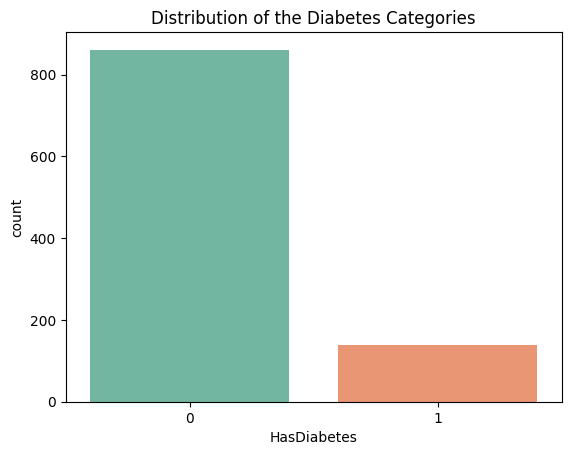

In [14]:
sns.countplot(data=df, x='HasDiabetes', palette='Set2')
plt.title('Distribution of the Diabetes Categories')
plt.show()

In [15]:
# Correlation Coefficient
corr = df.corr()
diabetes_corr = corr['HasDiabetes'].sort_values(ascending=False)
print(diabetes_corr)

HasDiabetes             1.000000
GenHlth                 0.212831
HighBP                  0.209911
BMI                     0.189988
HighChol                0.151172
Age                     0.132503
DiffWalk                0.113114
HeartDiseaseorAttack    0.095203
Stroke                  0.082929
PhysHlth                0.073011
CholCheck               0.064738
Smoker                  0.042032
AnyHealthcare           0.008795
Sex                     0.007996
MentHlth               -0.008393
NoDocbcCost            -0.023012
HvyAlcoholConsump      -0.028155
Fruits                 -0.028924
Education              -0.049135
Veggies                -0.071491
Income                 -0.076443
PhysActivity           -0.086784
Name: HasDiabetes, dtype: float64


The correlation values with the target variable ***HasDiabetes*** indicates the important variables that influence diabetes. Here are the **top 9** attributes with **stronger correlation**, which will be prioritized in this report:
GenHlth, HighBP, BMI, HighChol, Age, DiffWalk, HeartDIseaseorAttack, Stroke, PhysActivity. 

***Marginally related attributes:*** PhysHlth, CholCheck, Smoker.

***Negligible correlation:*** Income, Education, Veggies, Fruits, HvyAlcoholConsump, NoDocbcCost, MentHlth, Sex, AnyHealthcare. 

### Univariate Analysis

In [16]:
# Important features - 3 numerical and 6 categorical

features =['BMI', 'Age', 'GenHlth','HighBP','HighChol','Stroke','HeartDiseaseorAttack', 'PhysActivity','DiffWalk']

categorical_ft = [col for col in categorical_cols if col in features]

numerical_ft =  [col for col in numerical_cols if col in features]

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


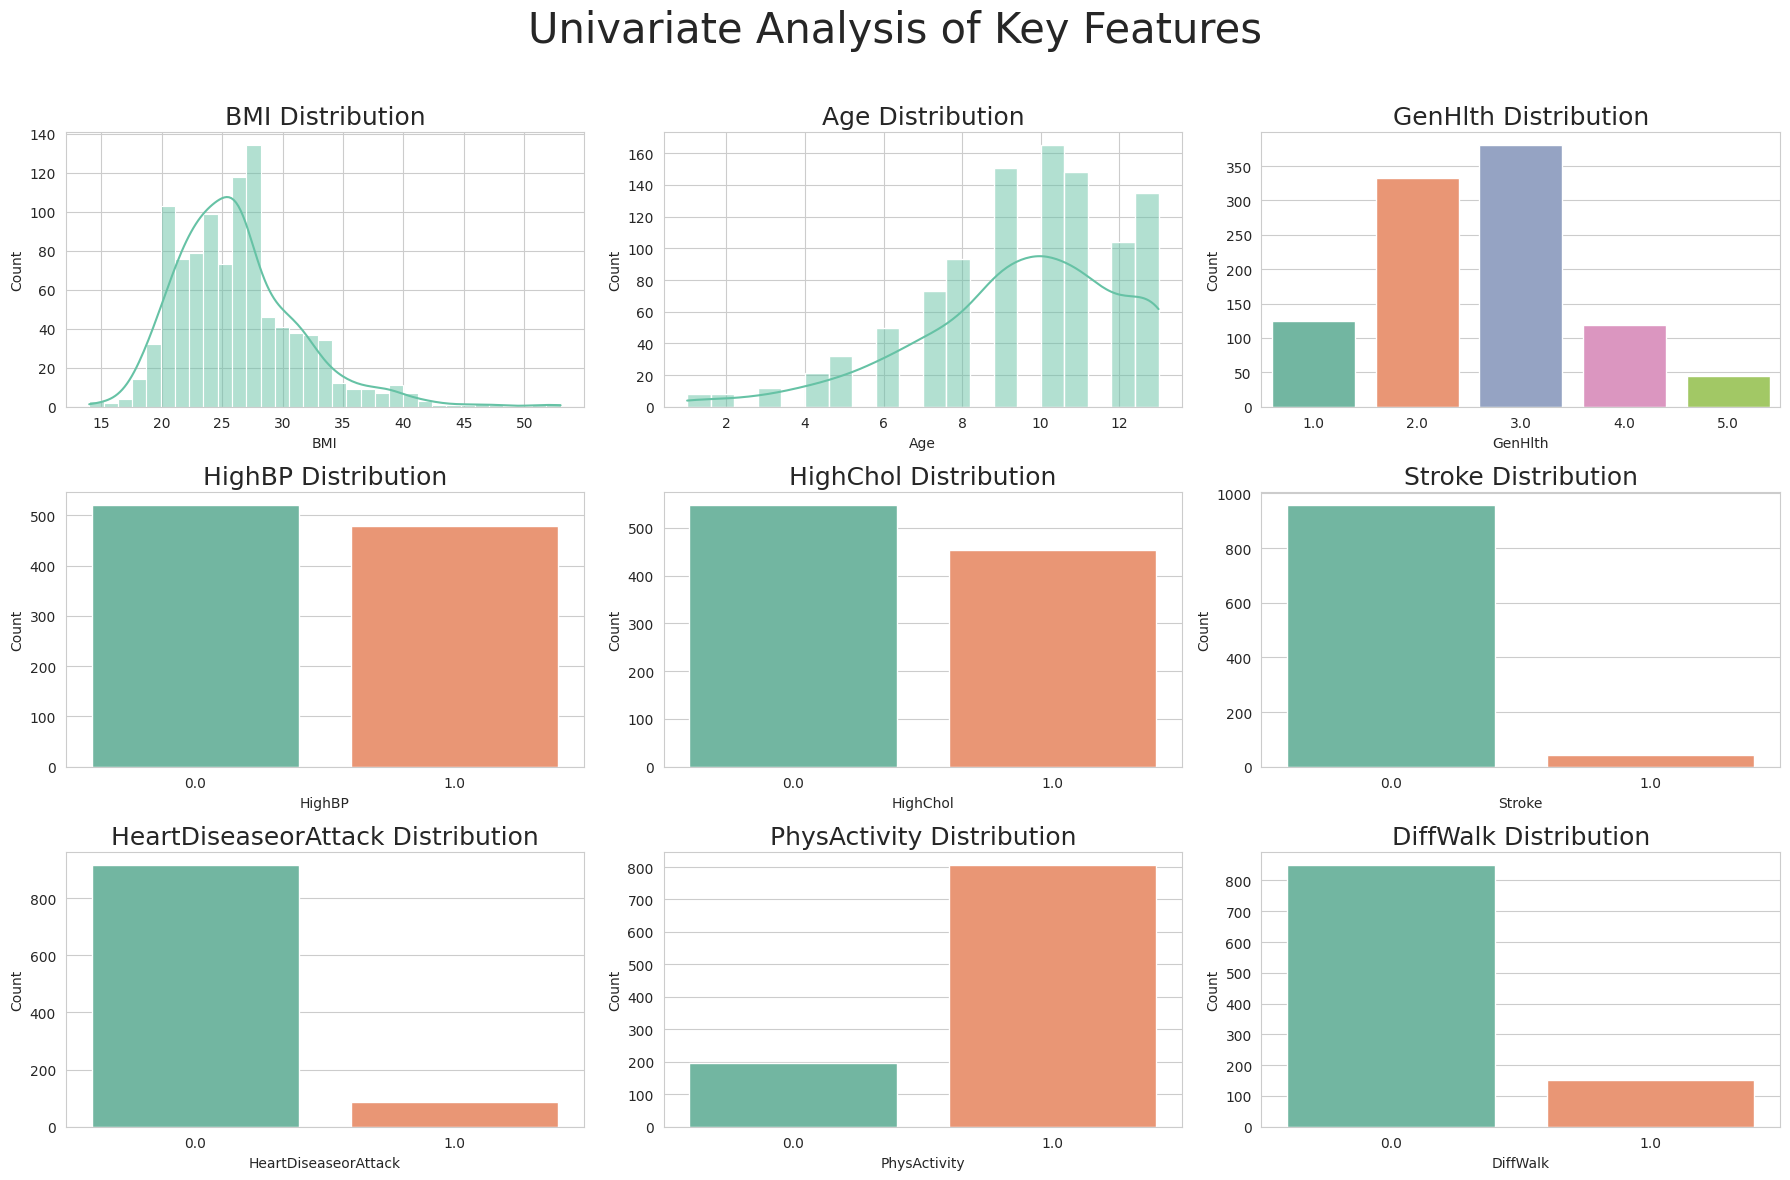

In [17]:
# Visualization of Key features distribution(histogram and countplots)
# Univariate Analysis

sns.set_palette('Set2')  
sns.set_style('whitegrid')

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    if df[feature].nunique() > 5: 
        sns.histplot(data=df, x=feature, kde=True, ax=axes[i], multiple='stack')
    else:  # Categorical variable
        sns.countplot(data=df, x=feature, ax=axes[i])
    
    axes[i].set_title(f'{feature} Distribution', fontsize=18)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

fig.suptitle('Univariate Analysis of Key Features', fontsize=30)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### Univariate Analysis of Key Features
The univariate plots give an overview of how each important variable is distributed across the sample. The following insights were derived:

***BMI*** shows a slightly right-skewed distribution, with a majority in the overweight range.

***Age*** is skewed toward middle-aged to older adults.

***GenHlth***, ***HighBP***, and ***HighChol*** show the population trends, with many respondents reporting "Good" health and high instances of hypertension and cholesterol.

Variables like ***Stroke, HeartDiseaseorAttack,*** and ***DiffWalk*** show that the majority of the population is not affected—but there are notable counts in the positive class, indicating chronic conditions.

***PhysActivity*** suggests most individuals are physically active.

### Bivariate Analysis

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

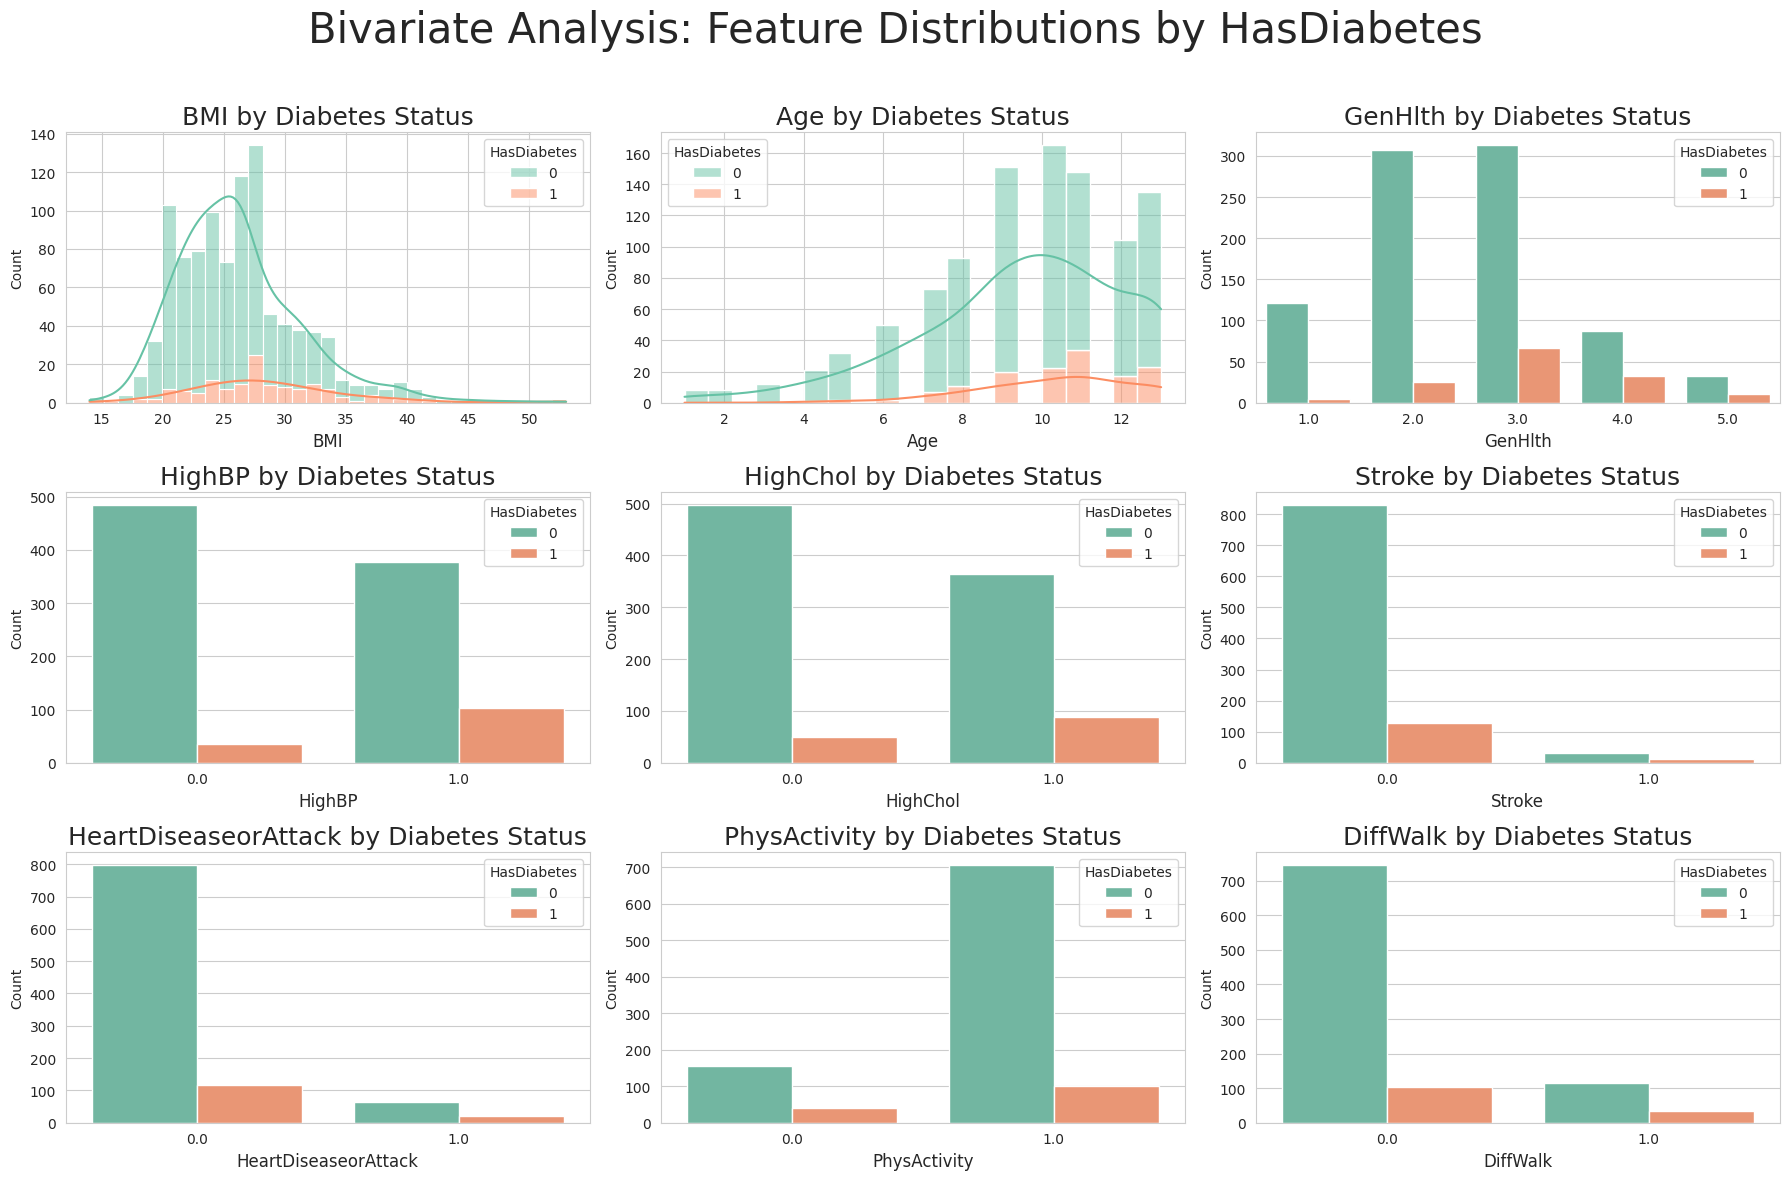

In [18]:
# Bivariate Analysis - Distribution vs HasDiabetes

sns.set_palette('Set2')  
sns.set_style('whitegrid')

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    if df[feature].nunique() > 5:
        sns.histplot(data=df, x=feature, kde=True, ax=axes[i],
                     hue='HasDiabetes', multiple='stack')
    else:
        sns.countplot(data=df, x=feature, ax=axes[i],
                      hue='HasDiabetes')
    
    axes[i].set_title(f'{feature} by Diabetes Status', fontsize=18)
    axes[i].set_xlabel(feature,fontsize=12)
    axes[i].set_ylabel('Count')

fig.suptitle('Bivariate Analysis: Feature Distributions by HasDiabetes', fontsize=30)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### Bivariate Analysis by HasDiabetes
To understand the influence of each variable on diabetes, I used hue-based bivariate plots:

***BMI*** and ***Age*** by Diabetes Status show that individuals with diabetes tend to have higher BMI and are more frequently in older age groups.

General Health(***GenHlth***) sharply differentiates between groups; those with diabetes report poorer health overall.

***HighBP*** and ***HighChol*** appear more common among diabetic individuals, aligning with their moderate positive correlations.

A stark contrast is seen in ***Stroke*** and Heart Disease ***(HeartDiseaseorAttack)***—both more frequent in diabetic groups.

***DiffWalk*** shows mobility difficulty is strongly associated with diabetes.

Interestingly, ***PhysActivity*** is slightly lower in diabetic individuals, hinting at lifestyle factors.

These plots reinforce statistical correlations and uncover visible distributional shifts associated with diabetes presence.

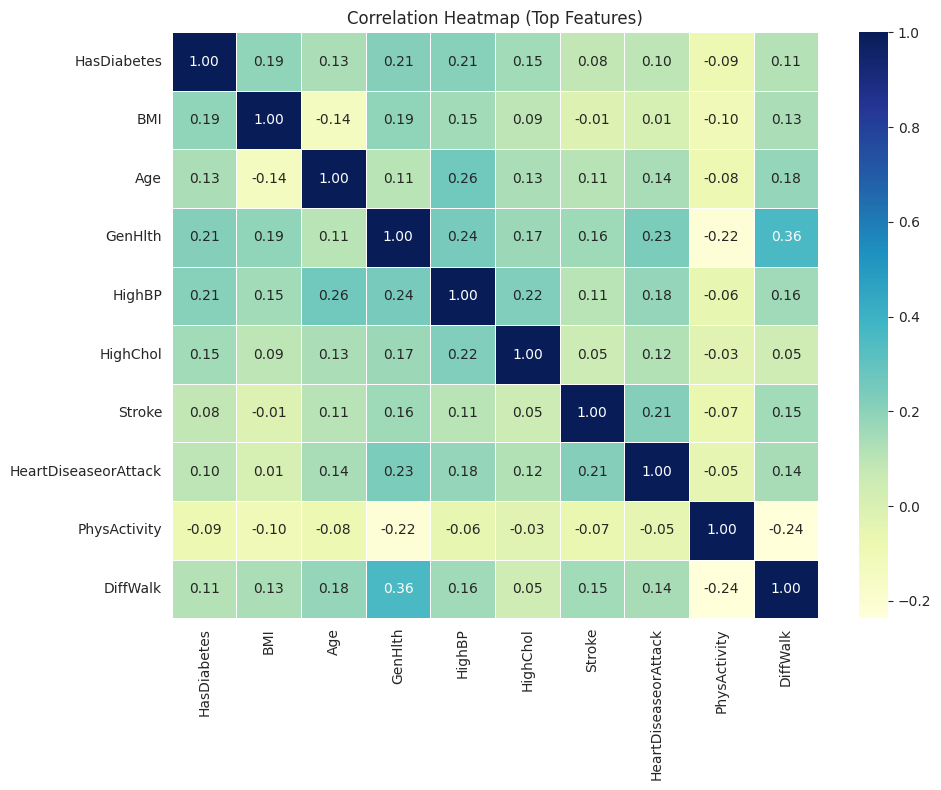

In [19]:
# ==== 3. Correlation Heatmap for top variables ====
top_features = ['HasDiabetes','BMI', 'Age', 'GenHlth','HighBP','HighChol',
                'Stroke','HeartDiseaseorAttack', 'PhysActivity','DiffWalk']

plt.figure(figsize=(10, 8))
corr_top = df[top_features].corr()
sns.heatmap(corr_top, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Top Features)')
plt.tight_layout()
plt.show()

**Correlations with Diabetes *(HasDiabetes):***

- Weak to moderate positive correlations: GenHlth (0.21), HighBP (0.21), BMI (0.19), DiffWalk (0.11), and HighChol (0.15).
- Weak negative correlation: PhysActivity (-0.09)

**Notable inter-feature relationships:**

- GenHlth and DiffWalk have a moderate correlation (0.36), suggesting that walking difficulty is often reported alongside poor general health.
- HighBP correlates mildly with Age (0.26) and GenHlth (0.24), consistent with age-related health deterioration.

# Summary

This report was executed to gain insights on the factors affecting diabetes, using a sample of 1000 individuals drawn from a large dataset. Through descriptive statistics, univariate and bivariate analysis, several meaningful patterns were identified. 

A significant number of the sample data fall into the overweight category and middle-aged to older adults. It is evident from the analysis that individuals with high BMI are more likely to be diabetic patients. 

Clear differences were observed—diabetic individuals were more likely to have high blood pressure and high cholesterol, report poor general health, and have physical limitations such as difficulty walking. On the other hand, non-diabetic individuals reported higher levels of physical activity and better overall health.

A correlation heatmap further reinforced these findings, with variables such as General Health, HighBP, BMI, and HighChol showing stronger positive associations with diabetes. These results align with well-established clinical risk factors for diabetes and confirm the relevance of these indicators in population health monitoring.


In conclusion, this EDA highlights the importance of routine health checkups and lifestyle management in diabetic prevention. While informative, it is important to note that this analysis is based on cross-sectional and self-reported data, which may be subject to reporting bias. Due to the lack of properly defined units of the attributes of the population data, assumptions were made to complete this exploratory data analysis (EDA). Future work could include predictive modeling techniques and time-series analyses to further investigate causality and enhance prediction accuracy.